# London Bike Sharing Dataset Analysis

## Dataset Information

This dataset was downloaded from https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset

The data is acquired from 3 sources:
- Https://cycling.data.tfl.gov.uk/ 'Contains OS data © Crown copyright and database rights 2016' and Geomni UK Map data © and database rights [2019] 'Powered by TfL Open Data'
- freemeteo.com - weather data
- https://www.gov.uk/bank-holidays
From 1/1/2015 to 31/12/2016

The data from cycling dataset is grouped by "Start time", this represent the count of new bike shares grouped by hour. The long duration shares are not taken in the count.

## Input the dataset

In [81]:
import pandas as pd
my_data=pd.read_csv("london_merged.csv")
display(my_data.head())

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015/1/4 0:00,182,3.0,2.0,93.0,6.0,3,0,1,3
1,2015/1/4 1:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2,2015/1/4 2:00,134,2.5,2.5,96.5,0.0,1,0,1,3
3,2015/1/4 3:00,72,2.0,2.0,100.0,0.0,1,0,1,3
4,2015/1/4 4:00,47,2.0,0.0,93.0,6.5,1,0,1,3


## Check the info of dataset

In [3]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
timestamp       17414 non-null object
cnt             17414 non-null int64
t1              17414 non-null float64
t2              17414 non-null float64
hum             17414 non-null float64
wind_speed      17414 non-null float64
weather_code    17414 non-null int64
is_holiday      17414 non-null int64
is_weekend      17414 non-null int64
season          17414 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.3+ MB


As we can see, there are totally 17,414 records, and there is no null in the whole dataset, meaning that the dataset is perfectly complete.

## Compare the numbers of loans in 2015 and 2016

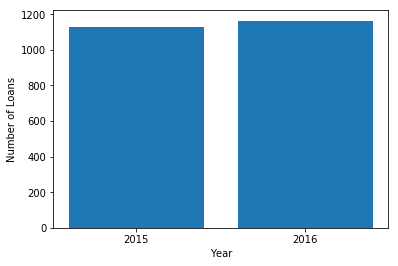

In [75]:
#import libaries for plot, numpy, and statistics functions
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats

#create lists to store the numbers of loans in 2015 and 2016 respectively
cnt_2015=[]
cnt_2016=[]
for x in range(0,len(my_data["cnt"])):
    time=my_data.iloc[x,0].split('/')
    if "2015" == str(time[0]):
        cnt_2015=cnt_2015+[my_data.iloc[x,1]]
    elif "2016" == str(time[0]):
        cnt_2016=cnt_2016+[my_data.iloc[x,1]]

#create the bar chart
plt.bar([0,1],[stats.mean(cnt_2015),stats.mean(cnt_2016)])
plt.xlabel('Year')
plt.ylabel('Number of Loans')
plt.xticks([0,1],["2015","2016"])
plt.show()

According to the bar chart, we can see that the total number of loans in 2016 is slightly more than the one in 2015.

## Compare the average numbers of loans at different moment on a day

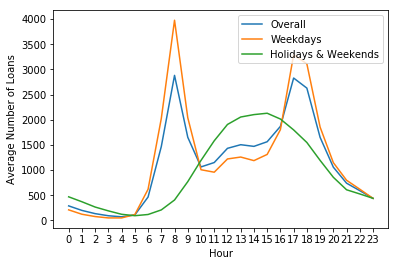

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats

#calculate the average numbers of loans at different moment on all days
total=[]
for num in range(0,24):
    cnt_list=[]
    for x in range(0,len(my_data["cnt"])):
        time=my_data.iloc[x,0].split('/')
        hour=time[2].split(' ')[1].split(':')[0]
        if str(hour)==str(num):
            cnt_list=cnt_list+[my_data.iloc[x,1]]
    total=total+[stats.mean(cnt_list)]
    
#calculate the average numbers of loans at different moment on weekdays
weekday=[]
for num in range(0,24):
    cnt_list=[]
    for x in range(0,len(my_data["cnt"])):
        time=my_data.iloc[x,0].split('/')
        hour=time[2].split(' ')[1].split(':')[0]
        if str(hour)==str(num) and my_data.iloc[x,7] ==0 and my_data.iloc[x,8] ==0 :
            cnt_list=cnt_list+[my_data.iloc[x,1]]
    weekday=weekday+[stats.mean(cnt_list)]
  
#calculate the average numbers of loans at different moment on holidays or weekends
holiday_and_weekend=[]
for num in range(0,24):
    cnt_list=[]
    for x in range(0,len(my_data["cnt"])):
        time=my_data.iloc[x,0].split('/')
        hour=time[2].split(' ')[1].split(':')[0]
        if str(hour)==str(num) :
            if my_data.iloc[x,7] ==1 or my_data.iloc[x,8] ==1:
                cnt_list=cnt_list+[my_data.iloc[x,1]]
    holiday_and_weekend=holiday_and_weekend+[stats.mean(cnt_list)]

#create the line plot
plt.plot(range(0,24),total)
plt.plot(range(0,24),weekday)
plt.plot(range(0,24),holiday_and_weekend)
plt.xticks(np.arange(24))
plt.xlabel("Hour")
plt.ylabel("Average Number of Loans")
plt.legend(["Overall","Weekdays","Holidays & Weekends"])
plt.show()

According to the figure, we can see that except for holidays and weekends, people in London borrow bikes the most during the intervals of 7~10 and 16~19 o'clock. This phenomenon can be attributed to the rush hour of the city.

In contrast, during weekends and holidays, since people do not need to commute to work, the numbers of loans are very low during the intervals of 7~10 and 16~19 o'clock, while the peak moment of loans usually appears between 11 to 18 o'clock.

## Compare the numbers of loans in different seasons

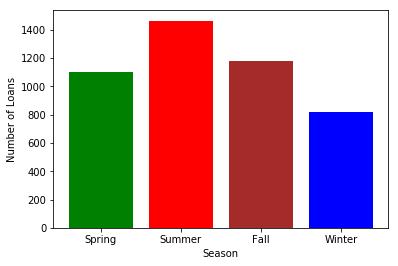

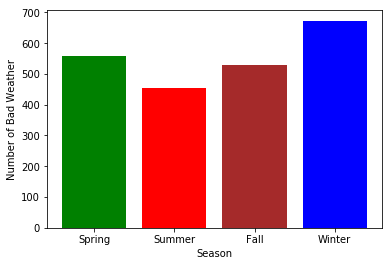

In [50]:
#import libaries for plot, numpy, and statistics functions
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats

#create lists to store numbers of loans in different seasons
cnt_season1=[]
cnt_season2=[]
cnt_season3=[]
cnt_season4=[]

#classify and store records into different seasons
for x in range(0,len(my_data["cnt"])):
    if my_data.iloc[x,-1]==0:
        cnt_season1=cnt_season1+[my_data.iloc[x,1]]
    elif my_data.iloc[x,-1]==1:
        cnt_season2=cnt_season2+[my_data.iloc[x,1]]
    elif my_data.iloc[x,-1]==2:
        cnt_season3=cnt_season3+[my_data.iloc[x,1]]
    elif my_data.iloc[x,-1]==3:
        cnt_season4=cnt_season4+[my_data.iloc[x,1]]

#generate bar plot for the numbers of loans in each seasons
plt.bar([0,1,2,3],[stats.mean(cnt_season1),stats.mean(cnt_season2),stats.mean(cnt_season3),stats.mean(cnt_season4)],color=['green','red','brown','blue'])
plt.xlabel('Season')
plt.ylabel('Number of Loans')
plt.xticks([0,1,2,3],["Spring","Summer","Fall","Winter"])
plt.show()

#create lists to store numbers of bad weather in different seasons
#bad weather here means the weather conditions that cannot let people ride bikes properly. Those weathers are represented by weather codes that are higher than 5
weather_count_1=0
weather_count_2=0
weather_count_3=0
weather_count_4=0

#classify and store weather records into different seasons
for x in range(0,len(my_data["cnt"])):
    if my_data.iloc[x,-4]>5:
        if my_data.iloc[x,-1]==0:
            weather_count_1+=1
        elif my_data.iloc[x,-1]==1:
            weather_count_2+=1
        elif my_data.iloc[x,-1]==2:
            weather_count_3+=1
        elif my_data.iloc[x,-1]==3:
            weather_count_4+=1
            
#generate bar plot for the numbers of loans in each seasons
plt.bar([0,1,2,3],[weather_count_1,weather_count_2,weather_count_3,weather_count_4],color=['green','red','brown','blue'])
plt.xlabel('Season')
plt.ylabel('Number of Bad Weather')
plt.xticks([0,1,2,3],["Spring","Summer","Fall","Winter"])
plt.show()

Based on the graphs, we can conclude that people in London loan bikes the most during summer, while using shared bikes the least in Winter. By looking at the second graph, we can understand this phenomenon is caused by the percentage of bad weathers in different seasons, as Summer had the least occasions of bad weathers and Winter had the most.

## Analyze the correlation between temperature and numbers of loans

<<* Correlation between real temperature and number of loans *>>
P-Value = 0.0
Correlation coefficient = 0.3887984512547322


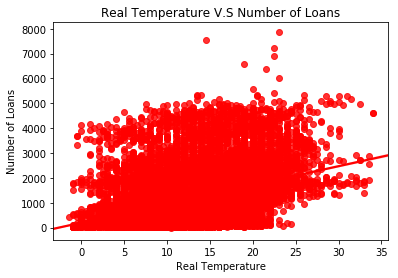

<<* Correlation between feels-like temperature and number of loans *>>
P-Value = 0.0
Correlation coefficient = 0.3690347940673492


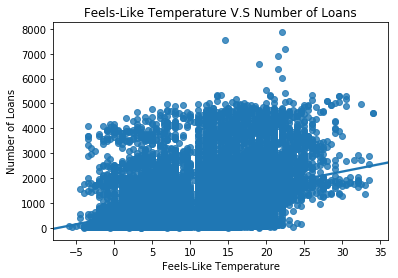

In [90]:
#import seaborn library
import seaborn as sis

#create regression plot for feels-like temperature and numbers of loans
sis.regplot(my_data["t1"],my_data["cnt"], color="red")
plt.title("Real Temperature V.S Number of Loans")
plt.xlabel("Real Temperature in C")
plt.ylabel("Number of Loans")

print("<<* Correlation between real temperature and number of loans *>>")

#run Pearson correlation test for real temperature and numbers of loans
cor, p_value=scipy.stats.pearsonr(my_data["t1"],my_data["cnt"])
print("P-Value = "+str(p_value))
print("Correlation coefficient = "+str(cor))
plt.show()

#create regression plot for feels-like temperature and numbers of loans
sis.regplot(my_data["t2"],my_data["cnt"])
plt.title("Feels-Like Temperature V.S Number of Loans")
plt.xlabel("Feels-Like Temperature in C")
plt.ylabel("Number of Loans")

print("<<* Correlation between feels-like temperature and number of loans *>>")

#run Pearson correlation test for feels-like temperature and numbers of loans
cor, p_value=scipy.stats.pearsonr(my_data["t2"],my_data["cnt"])
print("P-Value = "+str(p_value))
print("Correlation coefficient = "+str(cor))
plt.show()


As the p-value of pearson correlation test of real temperature and numbers of loans is lower than 0.05, it is significant that these two variables possess positive correlation, with correlation coefficent of 0.369.

In addition, the pearson correlation test of feels-like temperature and numbers of loans generates the same result.

## Analyze the correlation among humidity, wind speed, and numbers of loans

<<Correlation between real humidity and number of loans>>
P-Value = 0.0
Correlation coefficient = -0.4629009648427377


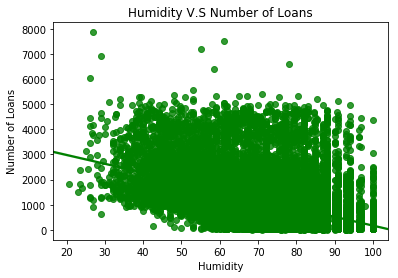

<<Correlation between wind speed and number of loans>>
P-Value = 1.6951058037023077e-53
Correlation coefficient = 0.11629523130936717


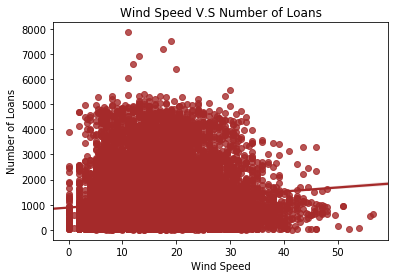

In [91]:
import seaborn as sis

#create regression plot for humidity and numbers of loans
sis.regplot(my_data["hum"],my_data["cnt"], color="green")
plt.title("Humidity V.S Number of Loans")
plt.xlabel("Humidity")
plt.ylabel("Number of Loans")

print("<<Correlation between real humidity and number of loans>>")

#run Pearson correlation test for humidity and numbers of loans
cor, p_value=scipy.stats.pearsonr(my_data["hum"],my_data["cnt"])
print("P-Value = "+str(p_value))
print("Correlation coefficient = "+str(cor))

plt.show()

#create regression plot for wind speed and numbers of loans
sis.regplot(my_data["wind_speed"],my_data["cnt"],color="brown")
plt.title("Wind Speed V.S Number of Loans")
plt.xlabel("Wind Speed")
plt.ylabel("Number of Loans")

print("<<Correlation between wind speed and number of loans>>")

#run Pearson correlation test for wind speed and numbers of loans
cor, p_value=scipy.stats.pearsonr(my_data["wind_speed"],my_data["cnt"])
print("P-Value = "+str(p_value))
print("Correlation coefficient = "+str(cor))

plt.show()


As the p-value of pearson correlation test of humidity and numbers of loans is lower than 0.05, it is significant that these two variables acquire negative correlation, with correlation coefficent of -0.4629.

On the other hand, the pearson correlation test of wind speed and numbers of loans surprisingly displays the positive correlation between two variables, while p-value is less than 0.05 and the correlation coefficent is around 0.1163. Nevertheless, by seeing the distribution of dots, it is possible to realize the higher numbers of loans are located between 10 to 30 km/h.

## Conclusion

1. Bike sharing is more common on weekdays than holidays or weekends, and people on weekdays borrow bikes the most to ride during rush hours, while holidays or weekends display the opposite.

2. The number of loans in London increases when the tempreature rises.

3. Bike sharing in London is more famous in summer, then fall, then spring and it is the least famous in winter.

4. People in London tend to ride bikes when the sky is clear, or only have few scattered clouds and tend not to ride when there is rain or snow .

6. People in London tend to ride bikes when the humidity is low.

7. Ideal wind speed for bike riding seems to be 10-30 km/h.

This is my exploratory data analysis on London Bike Sharing and the analysis will keep going on. Any comments and feedback are welcome.